In [125]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [126]:
df = pd.read_csv("C:\\backup\\internship\\day 6\\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [127]:
df.shape

(200, 5)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [129]:
df.duplicated().sum()

0

In [130]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Figure size 1600x1000 with 0 Axes>

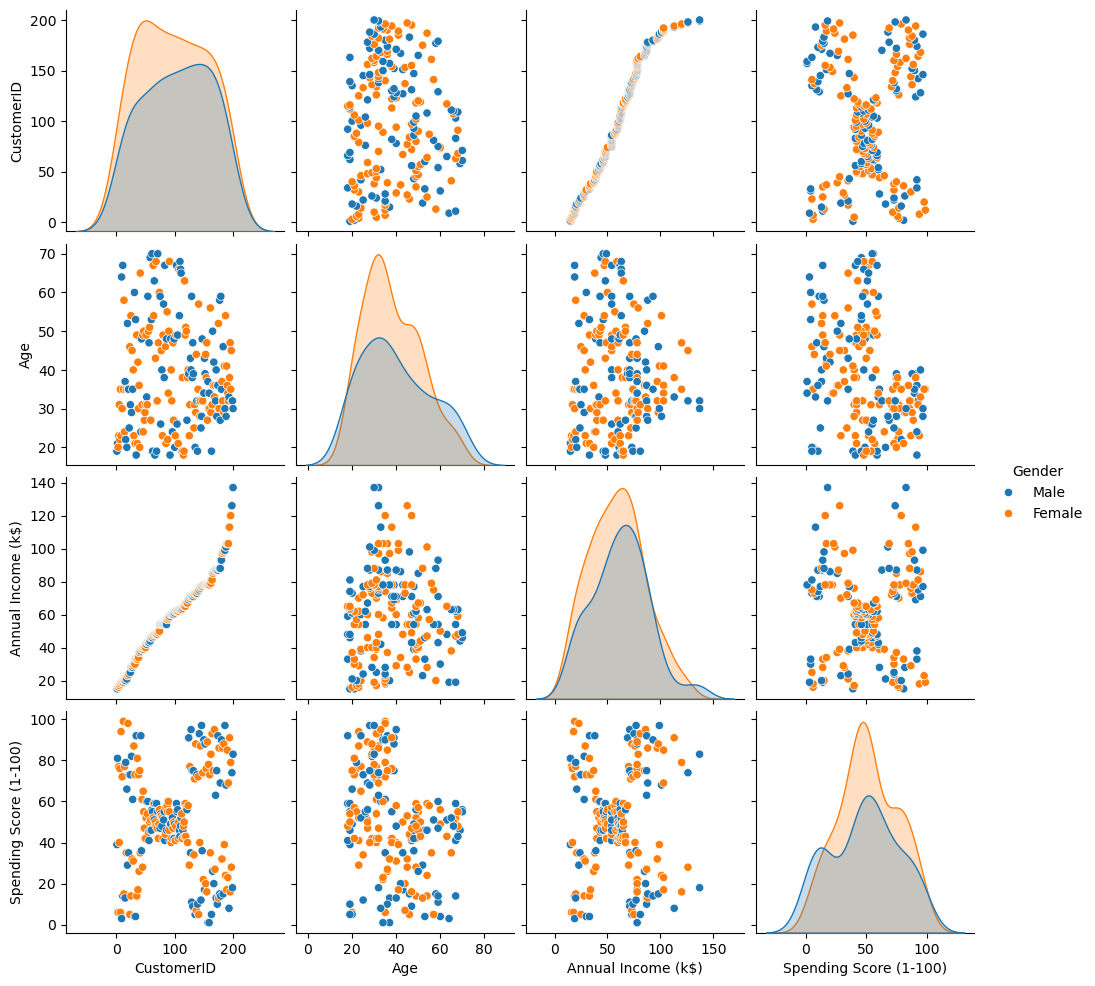

In [131]:
plt.figure(1, figsize=(16,10))
sns.pairplot(data=df, hue='Gender')
plt.show()

C:\Users\tenny\AppData\Local\Temp\ipykernel_23520\2056454749.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins=10)
C:\Users\tenny\AppData\Local\Temp\ipykernel_23520\2056454749.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins=10)
C:\Users\tenny\AppData\Local\Temp\ip

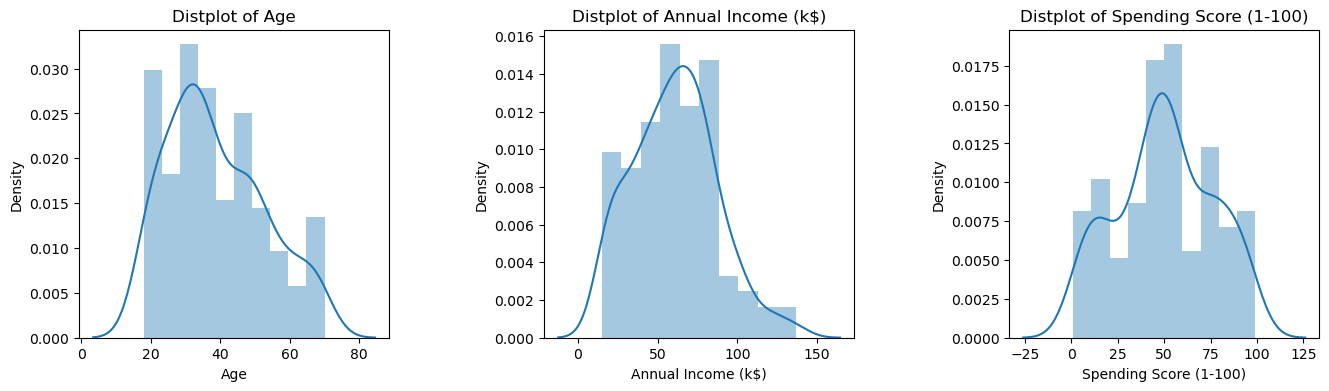

In [132]:
plt.figure(1, figsize=(16,4))
n = 0 
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.distplot(df[x] , bins=10)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [133]:
X = df.iloc[:, -2:]

In [134]:
X = df.iloc[:, -3:]

C:\Users\tenny\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tenny\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tenny\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tenny\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

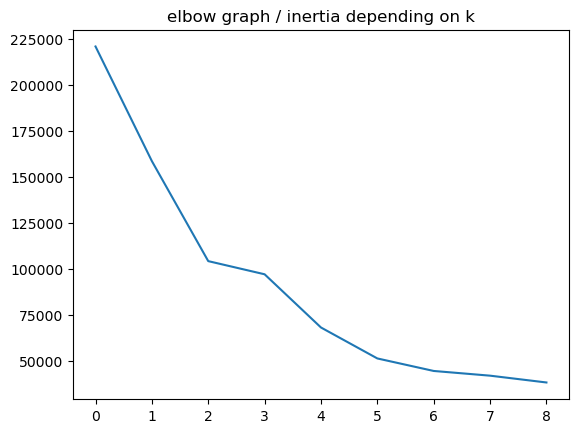

In [135]:
km_inertias, km_scores = [], []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(X, km.labels_))
    
sns.lineplot(km_inertias)
plt.title('elbow graph / inertia depending on k')
plt.show()

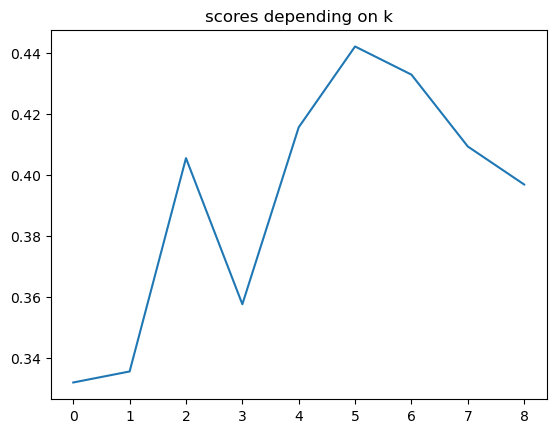

In [136]:
sns.lineplot(km_scores)
plt.title('scores depending on k')
plt.show()

In [137]:
km = KMeans(n_clusters=7).fit(X)

C:\Users\tenny\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


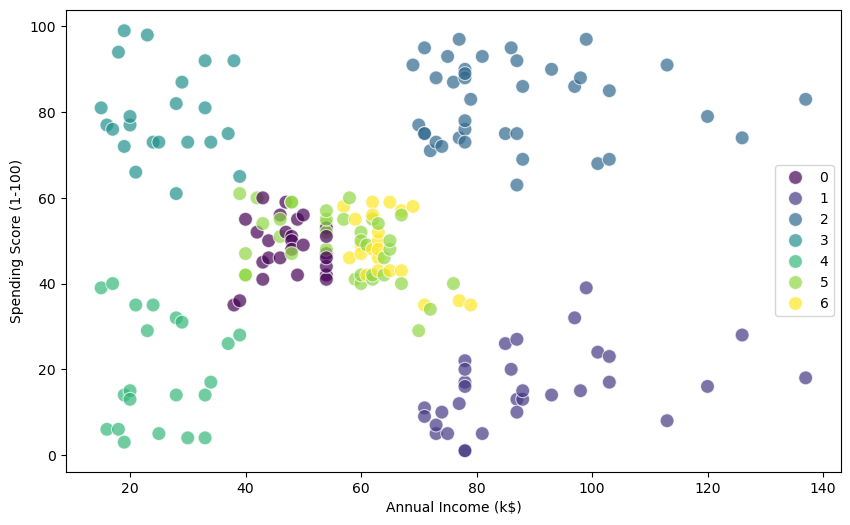

In [138]:
# K-Means visualization on pair of 2 features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 1], y=X.iloc[:, 2], hue=km.labels_, palette='viridis', s=100, alpha=0.7)
plt.show()

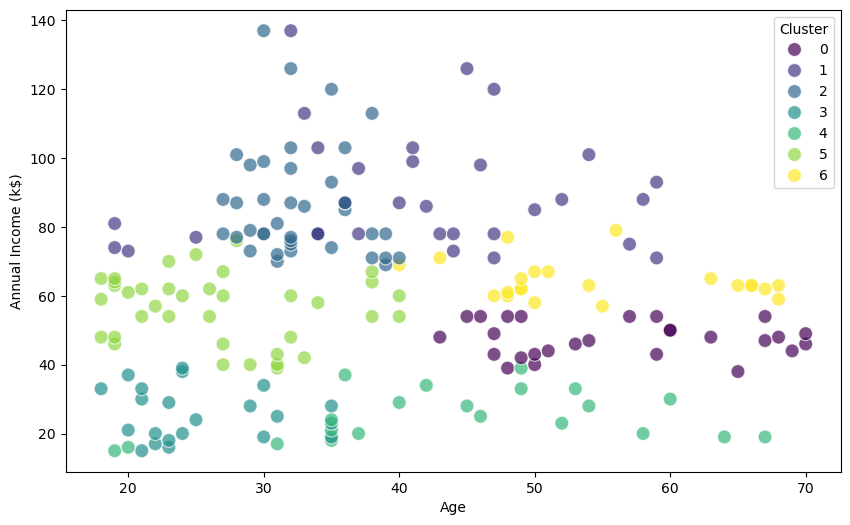

In [139]:
# K-Means visualization on another pair of 2 features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=km.labels_, palette='viridis', s=100, alpha=0.7)
#plt.xlabel('Age')  # Replace with the actual feature name if you have it
#plt.ylabel('Annual Income (k$)')  # Replace with the actual feature name if you have it
plt.legend(title='Cluster')
plt.show()

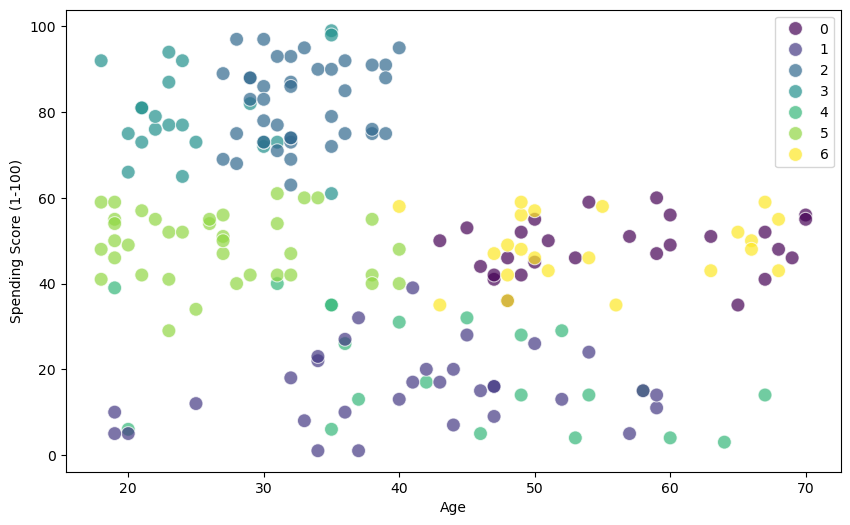

In [140]:
# K-Means visualization on the last pair of 2 features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 2], hue=km.labels_, palette='viridis', s=100, alpha=0.7)
plt.show()

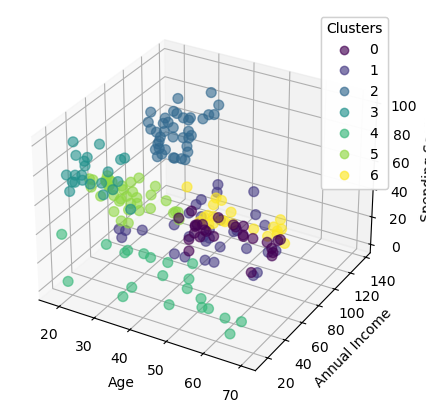

In [141]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Ensure that your data is properly scaled and fitted to the K-Means model
# Assuming 'X' is your scaled feature DataFrame and 'km' is your fitted K-Means model

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

# Define the features you want to plot in 3D
xs = X.iloc[:, 0]  # Change this to the actual feature name if available
ys = X.iloc[:, 1]  # Change this to the actual feature name if available
zs = X.iloc[:, 2]  # Change this to the actual feature name if available

# Scatter plot with colors based on K-Means labels
scatter = ax.scatter(xs, ys, zs, s=50, alpha=0.6, c=km.labels_, cmap='viridis')

# Adding labels
ax.set_xlabel('Age')  # Replace 'Feature 1' with the actual feature name
ax.set_ylabel('Annual Income')  # Replace 'Feature 2' with the actual feature name
ax.set_zlabel('Spending Score')  # Replace 'Feature 3' with the actual feature name

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

In [142]:
# Profiles of customers
X['label'] = km.labels_
X.label.value_counts()

label
2    39
5    37
1    32
0    27
3    22
6    22
4    21
Name: count, dtype: int64

In [143]:
for k in range(7):
    print(f'cluster nb : {k}')
    print(X[X.label == k].describe().iloc[[0, 1, 3, 7], :-1])
    print('\n\n')


cluster nb : 0
             Age  Annual Income (k$)  Spending Score (1-100)
count  27.000000           27.000000               27.000000
mean   56.074074           47.481481               48.444444
min    43.000000           38.000000               35.000000
max    70.000000           54.000000               60.000000



cluster nb : 1
        Age  Annual Income (k$)  Spending Score (1-100)
count  32.0            32.00000                32.00000
mean   41.0            89.40625                15.59375
min    19.0            71.00000                 1.00000
max    59.0           137.00000                39.00000



cluster nb : 2
             Age  Annual Income (k$)  Spending Score (1-100)
count  39.000000           39.000000               39.000000
mean   32.692308           86.538462               82.128205
min    27.000000           69.000000               63.000000
max    40.000000          137.000000               97.000000



cluster nb : 3
             Age  Annual Income (k$)  Spe